In [20]:
import numpy as np

In [21]:
def AND_gate(x):
    w1 = 0.5
    w2 = 0.5
    b = -0.7

    result=x[0]*w1 + x[1] * w2 + b

    if result <= 0 :
        return 0
    else:
        return 1

In [22]:
input_data=np.array([[0,0],[0,1],[1,0],[1,1]])
result=[]
for x in input_data:
    result.append(AND_gate(x))

print(result)

[0, 0, 0, 1]


In [23]:
def NAND_gate(x):
    w1= -0.5
    w2= -0.5
    b= 0.7
    result = x[0] * w1 + x[1] * w2 + b

    if result <= 0 :
        return 0
    else:
        return 1

In [24]:
result = []
for x in input_data:
    result.append(NAND_gate(x))

print(result)

[1, 1, 1, 0]


In [25]:
def OR_gate(x):
    w1 = 0.6
    w2 = 0.6
    b = -0.5

    result = x[0] * w1 + x[1] * w2 + b

    if result <= 0 :
        return 0
    else:
        return 1

In [26]:
result = []
for x in input_data:
    result.append(OR_gate(x))

print(result)

[0, 1, 1, 1]


In [28]:
s1=[]
s2=[]
new_input=[]
final_output=[]

for i in range(len(input_data)):
    s1=NAND_gate(input_data[i])
    s2=OR_gate(input_data[i])
    new_input.append(s1)
    new_input.append(s2)

    result=AND_gate(new_input)
    final_output.append(result)
    new_input=[]
print(final_output)

[0, 1, 1, 0]


# 인공신경망 XOR 구현

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
x = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y = torch.FloatTensor([[0],[1],[1],[0]])

In [34]:
model=nn.Sequential(
    nn.Linear(2, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10,bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10,bias=True),
    nn.Sigmoid(),
    nn.Linear(10,1,bias=True),
    nn.Sigmoid()
)

In [35]:
criterion=torch.nn.BCELoss()
optimizer=optim.SGD(model.parameters(), lr = 1)

In [37]:
for epoch in range(10001):
    optimizer.zero_grad()

    y_hat=model(x)
    cost=criterion(y_hat, y)
    cost.backward()
    optimizer.step()

    if epoch % 1000 == 0 :
        print('Epoch : ',epoch, 'cost : ', cost.item())

Epoch :  0 cost :  0.6930866837501526
Epoch :  1000 cost :  0.6929999589920044
Epoch :  2000 cost :  0.6923481225967407
Epoch :  3000 cost :  0.0035016664769500494
Epoch :  4000 cost :  0.0006743443664163351
Epoch :  5000 cost :  0.0003571318229660392
Epoch :  6000 cost :  0.0002396084018982947
Epoch :  7000 cost :  0.0001791014219634235
Epoch :  8000 cost :  0.0001424998918082565
Epoch :  9000 cost :  0.0001179833707283251
Epoch :  10000 cost :  0.00010048248805105686


In [41]:
with torch.no_grad():
    h = model(x)
    prediction = (h>0.5).float()
    accuray = (prediction==y).float().mean()
    print(h)
    print(prediction)
    print(accuray)
    print(y)

tensor([[8.1565e-05],
        [9.9990e-01],
        [9.9990e-01],
        [1.1730e-04]])
tensor([[0.],
        [1.],
        [1.],
        [0.]])
tensor(1.)
tensor([[0.],
        [1.],
        [1.],
        [0.]])


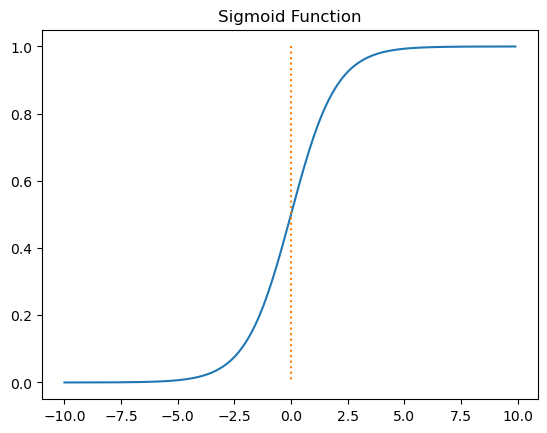

In [44]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.arange(-10.0, 10.0, 0.1)
y=sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

In [46]:
x=np.arange(-5.0, 5.0, 0.1)
y=np.tanh(x)

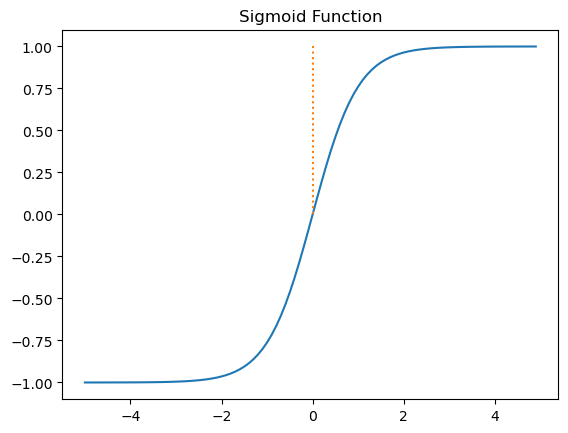

In [49]:
# tanh : 하이퍼블릭 탄젠트
plt.plot(x,y)
plt.plot([0,0],[1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

In [ ]:
x=np.arange(-5.0, 5.0, 0.1)
y=np.exp(x)/np.sum(np.exp(x))
print(y.sum())
print(y)

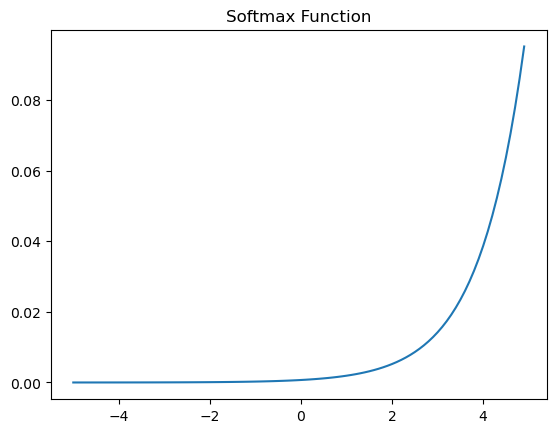

In [59]:
plt.plot(x,y)
plt.title('Softmax Function')
plt.show()